# Google Play Store Apps - Data Analysis Project
## Notebook 4: Advanced Analysis and Business Insights

### 1. Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load data
df_apps = pd.read_csv('apps_cleaned.csv')
df_reviews = pd.read_csv('reviews_cleaned.csv')

print(f"Data loaded: Apps {df_apps.shape}, Reviews {df_reviews.shape}")


Data loaded: Apps (8196, 17), Reviews (20375, 5)


### 2. Category Deep Dive

=== Top 10 Categories by Total Installs ===
                    App_Count  Avg_Rating  Total_Reviews  Total_Installs  \
Category                                                                   
GAME                      912        4.25    622295937.0    1.387876e+10   
COMMUNICATION             256        4.12    285810907.0    1.103824e+10   
TOOLS                     718        4.04    229355702.0    7.999724e+09   
PRODUCTIVITY              301        4.18     55590391.0    5.793070e+09   
SOCIAL                    203        4.25    227927470.0    5.487841e+09   
PHOTOGRAPHY               263        4.16    105351227.0    4.649143e+09   
FAMILY                   1608        4.18    143822304.0    4.427480e+09   
VIDEO_PLAYERS             148        4.04     67484072.0    3.926797e+09   
TRAVEL_AND_LOCAL          187        4.07     26819594.0    2.894859e+09   
NEWS_AND_MAGAZINES        204        4.12     23129264.0    2.369111e+09   

                    Avg_Price  
Category   

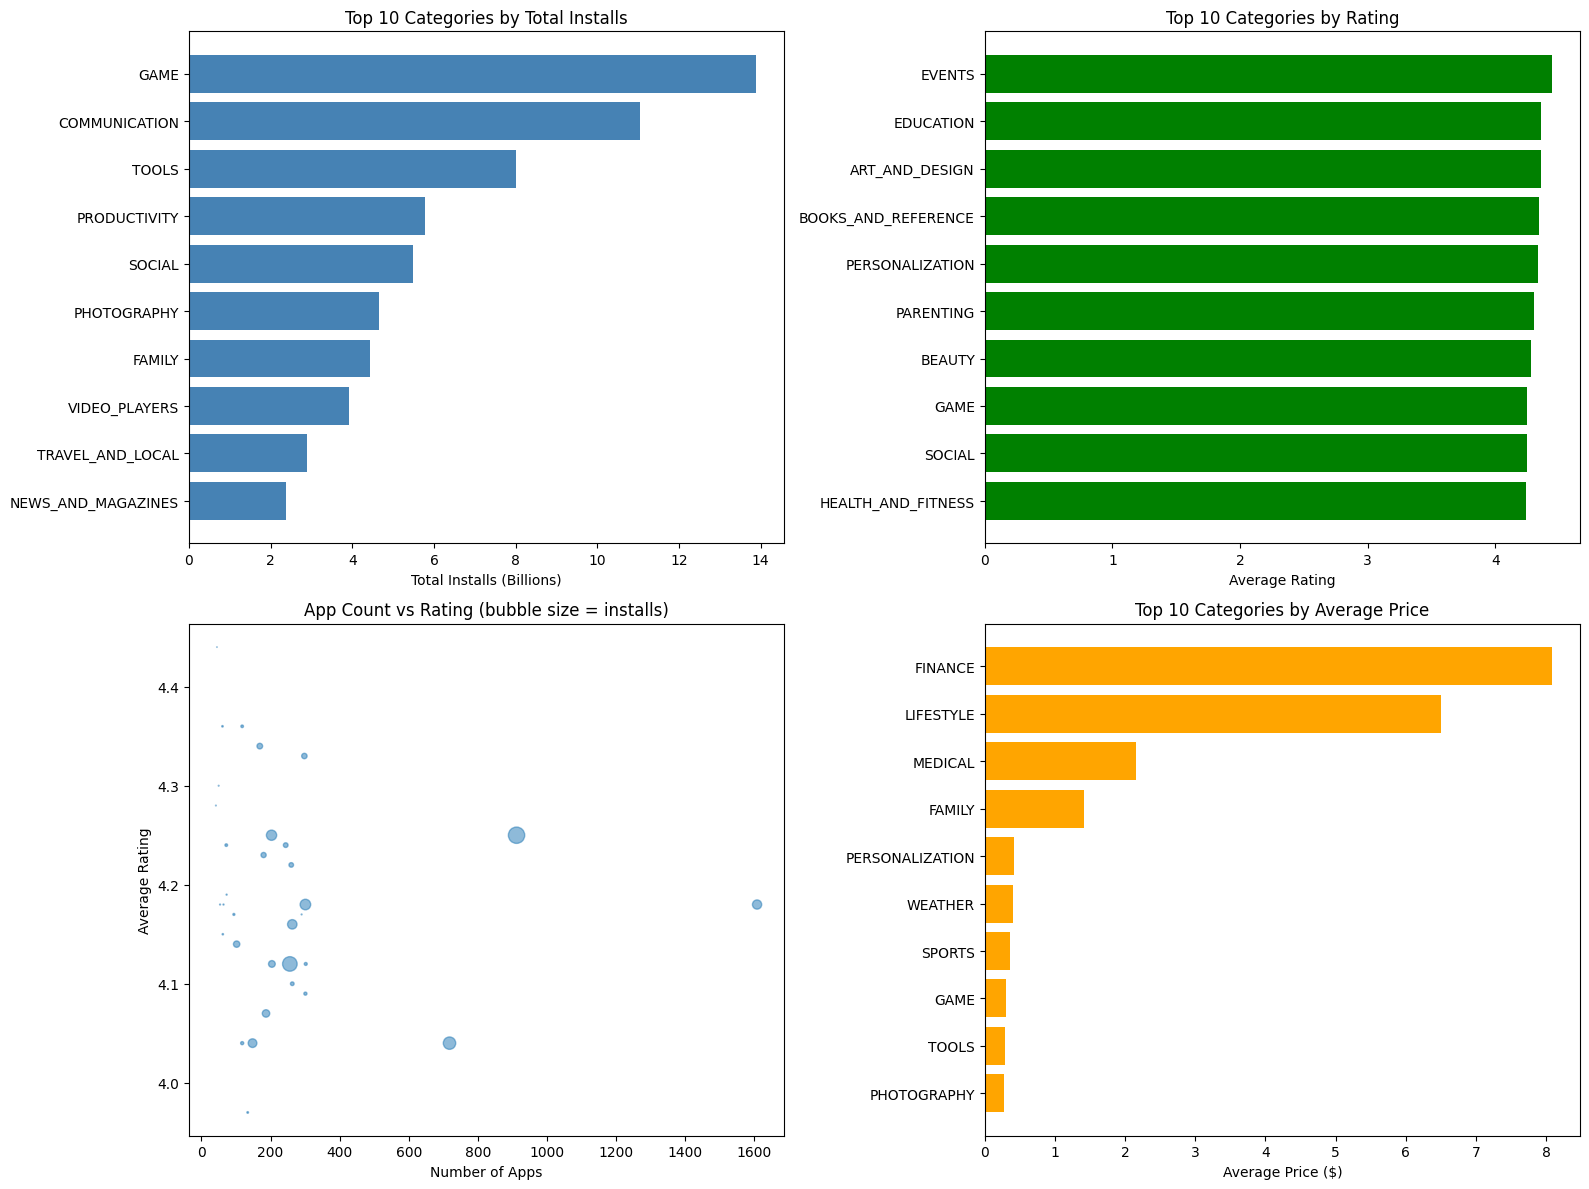

In [2]:
# Category performance metrics
category_metrics = df_apps.groupby('Category').agg({
    'App': 'count',
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum',
    'Price': 'mean'
}).round(2)

category_metrics.columns = ['App_Count', 'Avg_Rating', 'Total_Reviews', 'Total_Installs', 'Avg_Price']
category_metrics = category_metrics.sort_values('Total_Installs', ascending=False)

print("=== Top 10 Categories by Total Installs ===")
print(category_metrics.head(10))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top categories by installs
top_10 = category_metrics.head(10)
axes[0, 0].barh(top_10.index, top_10['Total_Installs'] / 1e9, color='steelblue')
axes[0, 0].set_xlabel('Total Installs (Billions)')
axes[0, 0].set_title('Top 10 Categories by Total Installs')
axes[0, 0].invert_yaxis()

# Categories by average rating
top_rated = category_metrics.nlargest(10, 'Avg_Rating')
axes[0, 1].barh(top_rated.index, top_rated['Avg_Rating'], color='green')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_title('Top 10 Categories by Rating')
axes[0, 1].invert_yaxis()

# App count vs average rating
axes[1, 0].scatter(category_metrics['App_Count'], category_metrics['Avg_Rating'],
                   s=category_metrics['Total_Installs']/1e8, alpha=0.5)
axes[1, 0].set_xlabel('Number of Apps')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_title('App Count vs Rating (bubble size = installs)')

# Price distribution by category
top_price_cats = category_metrics.nlargest(10, 'Avg_Price')
axes[1, 1].barh(top_price_cats.index, top_price_cats['Avg_Price'], color='orange')
axes[1, 1].set_xlabel('Average Price ($)')
axes[1, 1].set_title('Top 10 Categories by Average Price')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


### 3. Success Factors Analysis

=== Success Rate: 20.22% ===

=== Success Comparison ===
              Rating   Reviews  Size  Price    Installs
Unsuccessful    4.12     831.0  11.0    1.3    100000.0
Successful      4.39  258717.0  26.0    0.0  10000000.0


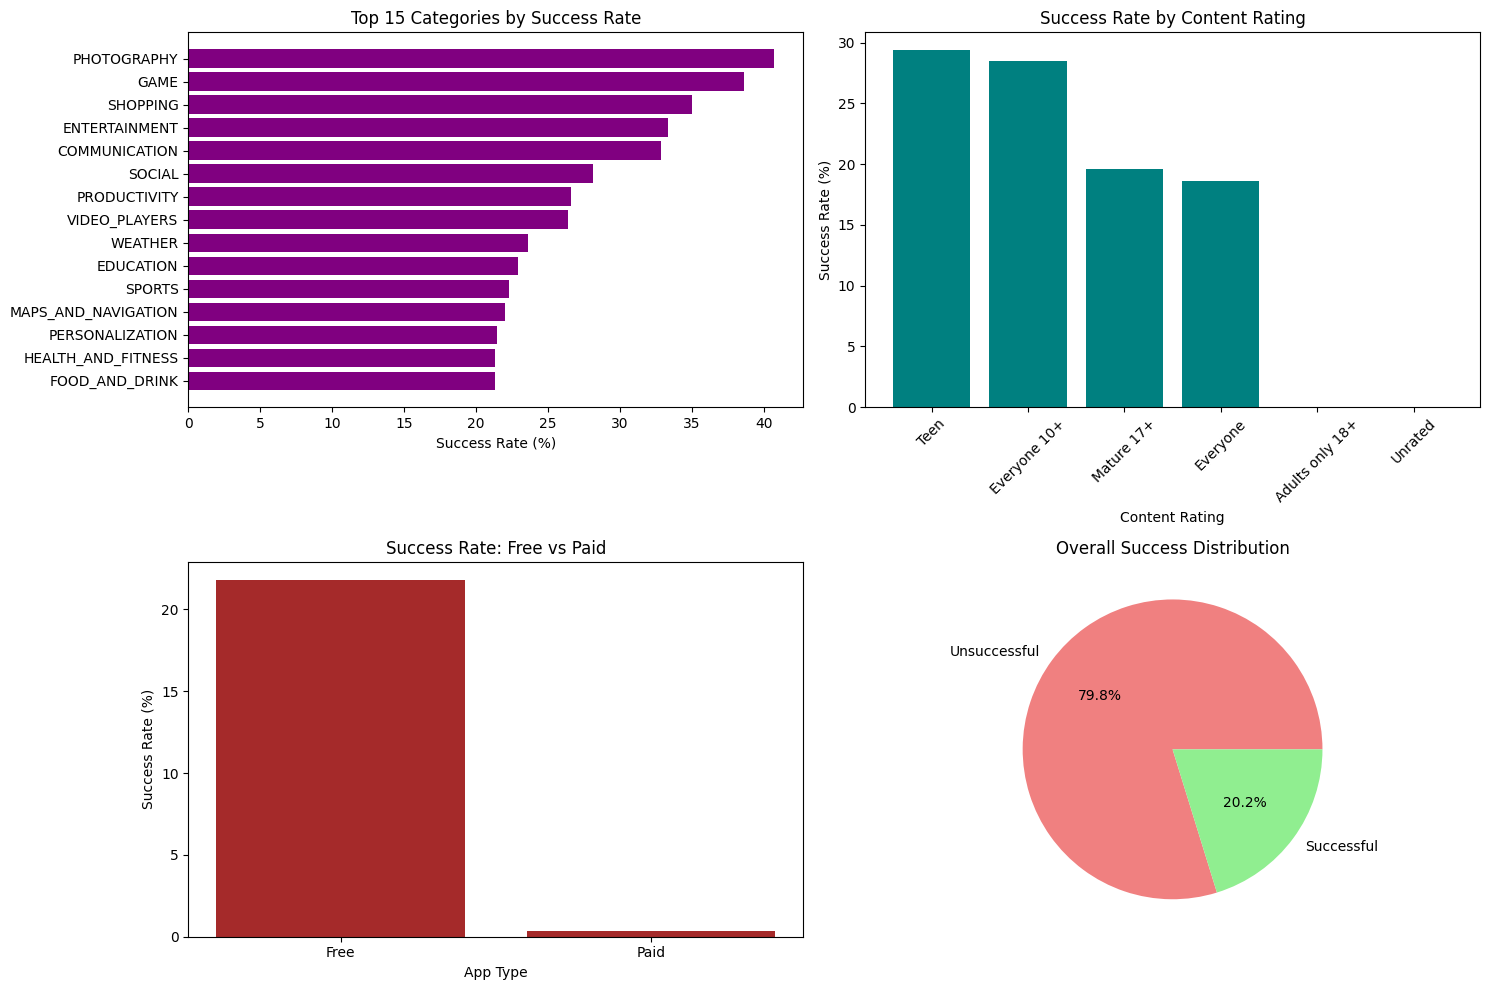

In [3]:
# Define success metrics
# High success: Rating > 4.0 AND Installs > 1,000,000
df_apps['Success'] = ((df_apps['Rating'] > 4.0) & (df_apps['Installs'] > 1000000)).astype(int)

success_rate = df_apps['Success'].mean() * 100
print(f"=== Success Rate: {success_rate:.2f}% ===")

# Compare successful vs unsuccessful apps
success_comparison = df_apps.groupby('Success').agg({
    'Rating': 'mean',
    'Reviews': 'median',
    'Size': 'median',
    'Price': 'mean',
    'Installs': 'median'
}).round(2)

success_comparison.index = ['Unsuccessful', 'Successful']
print("\n=== Success Comparison ===")
print(success_comparison)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Success by category
cat_success = df_apps.groupby('Category')['Success'].mean().sort_values(ascending=False).head(15)
axes[0, 0].barh(cat_success.index, cat_success.values * 100, color='purple')
axes[0, 0].set_xlabel('Success Rate (%)')
axes[0, 0].set_title('Top 15 Categories by Success Rate')
axes[0, 0].invert_yaxis()

# Success by content rating
content_success = df_apps.groupby('Content Rating')['Success'].mean().sort_values(ascending=False)
axes[0, 1].bar(content_success.index, content_success.values * 100, color='teal')
axes[0, 1].set_xlabel('Content Rating')
axes[0, 1].set_ylabel('Success Rate (%)')
axes[0, 1].set_title('Success Rate by Content Rating')
axes[0, 1].tick_params(axis='x', rotation=45)

# Success by type
type_success = df_apps.groupby('Type')['Success'].mean()
axes[1, 0].bar(type_success.index, type_success.values * 100, color='brown')
axes[1, 0].set_xlabel('App Type')
axes[1, 0].set_ylabel('Success Rate (%)')
axes[1, 0].set_title('Success Rate: Free vs Paid')

# Success distribution
success_counts = df_apps['Success'].value_counts()
axes[1, 1].pie(success_counts.values, labels=['Unsuccessful', 'Successful'],
               autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Overall Success Distribution')

plt.tight_layout()
plt.show()


### 4. Price Strategy Analysis

=== Price Range Analysis ===
             App_Count  Avg_Rating  Median_Installs  Median_Reviews
Price_Range                                                        
$0-1               106        4.30           1000.0            88.5
$1-5               383        4.27           5000.0           315.0
$5-10               59        4.23           5000.0           238.0
$10-20              31        4.25           1000.0            77.0
$20-50               9        4.12           1000.0           134.0
$50+                16        3.91           5000.0           209.0


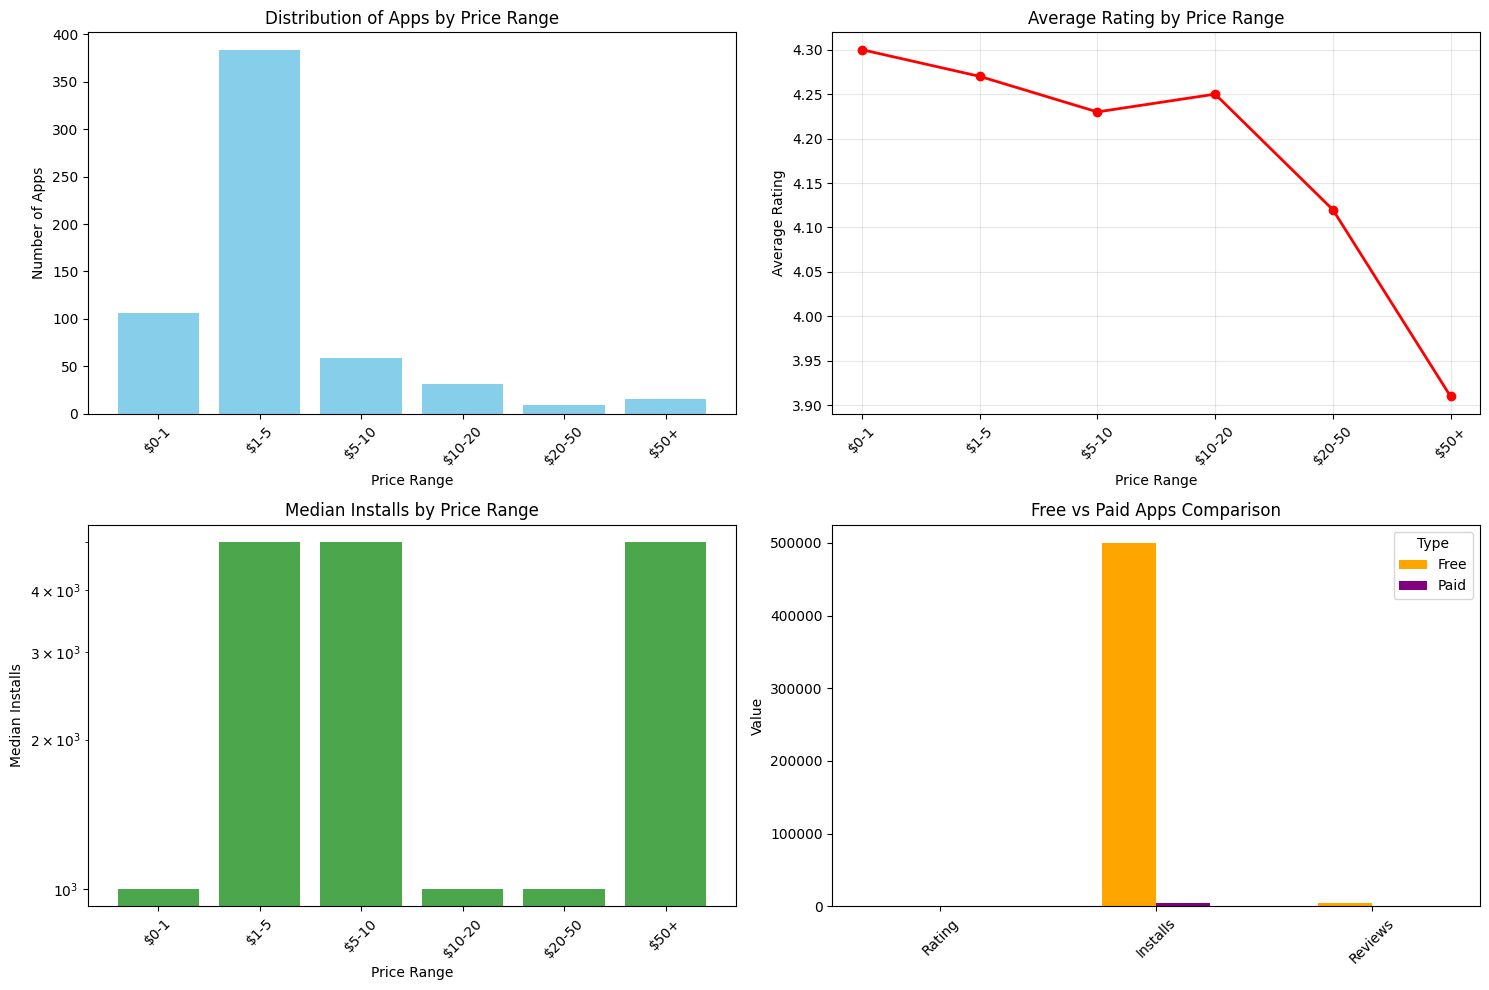

In [4]:
# Analyze optimal pricing
paid_apps = df_apps[df_apps['Price'] > 0].copy()

# Group by price ranges
paid_apps['Price_Range'] = pd.cut(paid_apps['Price'],
                                   bins=[0, 1, 5, 10, 20, 50, 400],
                                   labels=['$0-1', '$1-5', '$5-10', '$10-20', '$20-50', '$50+'])

price_analysis = paid_apps.groupby('Price_Range').agg({
    'App': 'count',
    'Rating': 'mean',
    'Installs': 'median',
    'Reviews': 'median'
}).round(2)

price_analysis.columns = ['App_Count', 'Avg_Rating', 'Median_Installs', 'Median_Reviews']
print("=== Price Range Analysis ===")
print(price_analysis)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Apps per price range
axes[0, 0].bar(price_analysis.index, price_analysis['App_Count'], color='skyblue')
axes[0, 0].set_xlabel('Price Range')
axes[0, 0].set_ylabel('Number of Apps')
axes[0, 0].set_title('Distribution of Apps by Price Range')
axes[0, 0].tick_params(axis='x', rotation=45)

# Rating by price range
axes[0, 1].plot(price_analysis.index, price_analysis['Avg_Rating'], marker='o', linewidth=2, color='red')
axes[0, 1].set_xlabel('Price Range')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Price Range')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Installs by price range
axes[1, 0].bar(price_analysis.index, price_analysis['Median_Installs'], color='green', alpha=0.7)
axes[1, 0].set_xlabel('Price Range')
axes[1, 0].set_ylabel('Median Installs')
axes[1, 0].set_title('Median Installs by Price Range')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_yscale('log')

# Free vs Paid comparison
type_metrics = df_apps.groupby('Type').agg({
    'Rating': 'mean',
    'Installs': 'median',
    'Reviews': 'median'
}).T
type_metrics.plot(kind='bar', ax=axes[1, 1], color=['orange', 'purple'])
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Free vs Paid Apps Comparison')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Type')

plt.tight_layout()
plt.show()


### 5. Update Frequency Analysis

=== Update Recency Analysis ===
                App_Count  Avg_Rating  Median_Installs
Update_Recency                                        
< 1 month            2558        4.27        1000000.0
1-3 months           1666        4.21         500000.0
3-6 months            920        4.15         100000.0
6-12 months          1034        4.12         100000.0
> 1 year             1378        4.07          10000.0


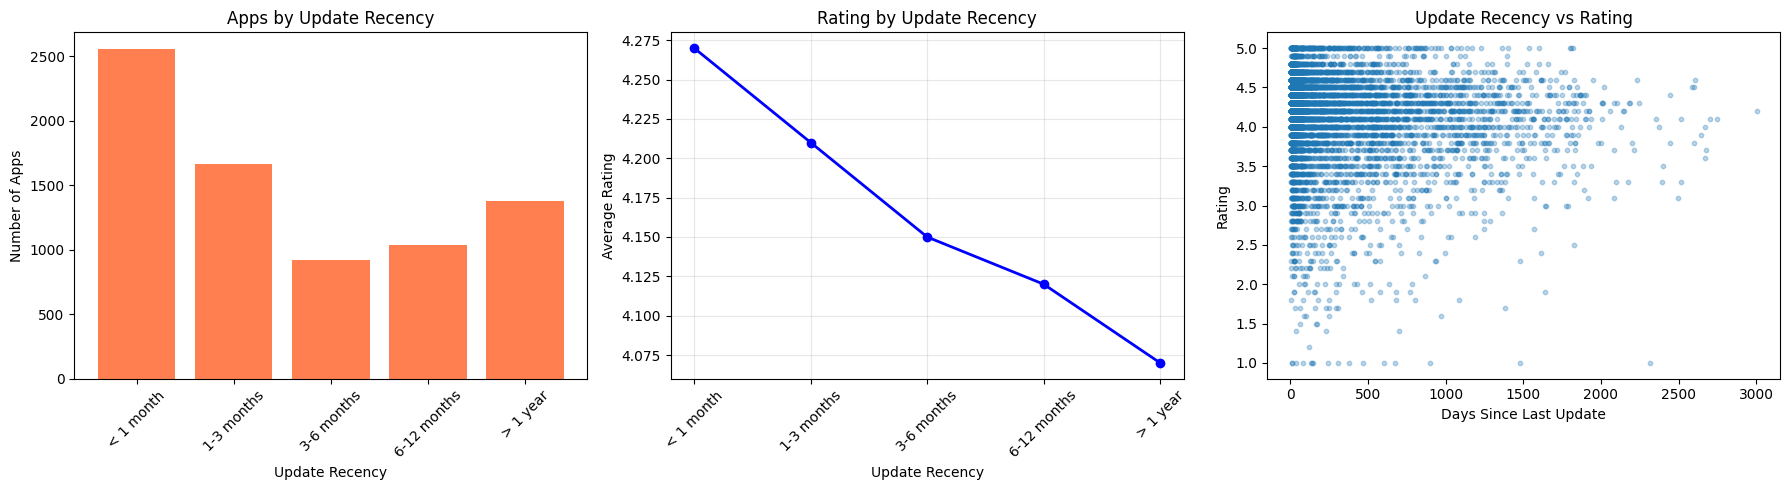


Correlation between Days Since Update and Rating: -0.130


In [5]:
# Analyze update patterns
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')
current_date = pd.to_datetime('2018-08-10')
df_apps['Days_Since_Update'] = (current_date - df_apps['Last Updated']).dt.days

# Categorize update frequency
df_apps['Update_Recency'] = pd.cut(df_apps['Days_Since_Update'],
                                     bins=[-1, 30, 90, 180, 365, 1000],
                                     labels=['< 1 month', '1-3 months', '3-6 months', '6-12 months', '> 1 year'])

# Analysis
update_analysis = df_apps.groupby('Update_Recency').agg({
    'App': 'count',
    'Rating': 'mean',
    'Installs': 'median'
}).round(2)

update_analysis.columns = ['App_Count', 'Avg_Rating', 'Median_Installs']
print("=== Update Recency Analysis ===")
print(update_analysis)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution
axes[0].bar(update_analysis.index, update_analysis['App_Count'], color='coral')
axes[0].set_xlabel('Update Recency')
axes[0].set_ylabel('Number of Apps')
axes[0].set_title('Apps by Update Recency')
axes[0].tick_params(axis='x', rotation=45)

# Rating by update recency
axes[1].plot(update_analysis.index, update_analysis['Avg_Rating'], marker='o', linewidth=2, color='blue')
axes[1].set_xlabel('Update Recency')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating by Update Recency')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Correlation scatter
valid_data = df_apps[['Days_Since_Update', 'Rating']].dropna()
axes[2].scatter(valid_data['Days_Since_Update'], valid_data['Rating'], alpha=0.3, s=10)
axes[2].set_xlabel('Days Since Last Update')
axes[2].set_ylabel('Rating')
axes[2].set_title('Update Recency vs Rating')

plt.tight_layout()
plt.show()

print(f"\nCorrelation between Days Since Update and Rating: {valid_data['Days_Since_Update'].corr(valid_data['Rating']):.3f}")


### 6. Competitive Analysis by Category

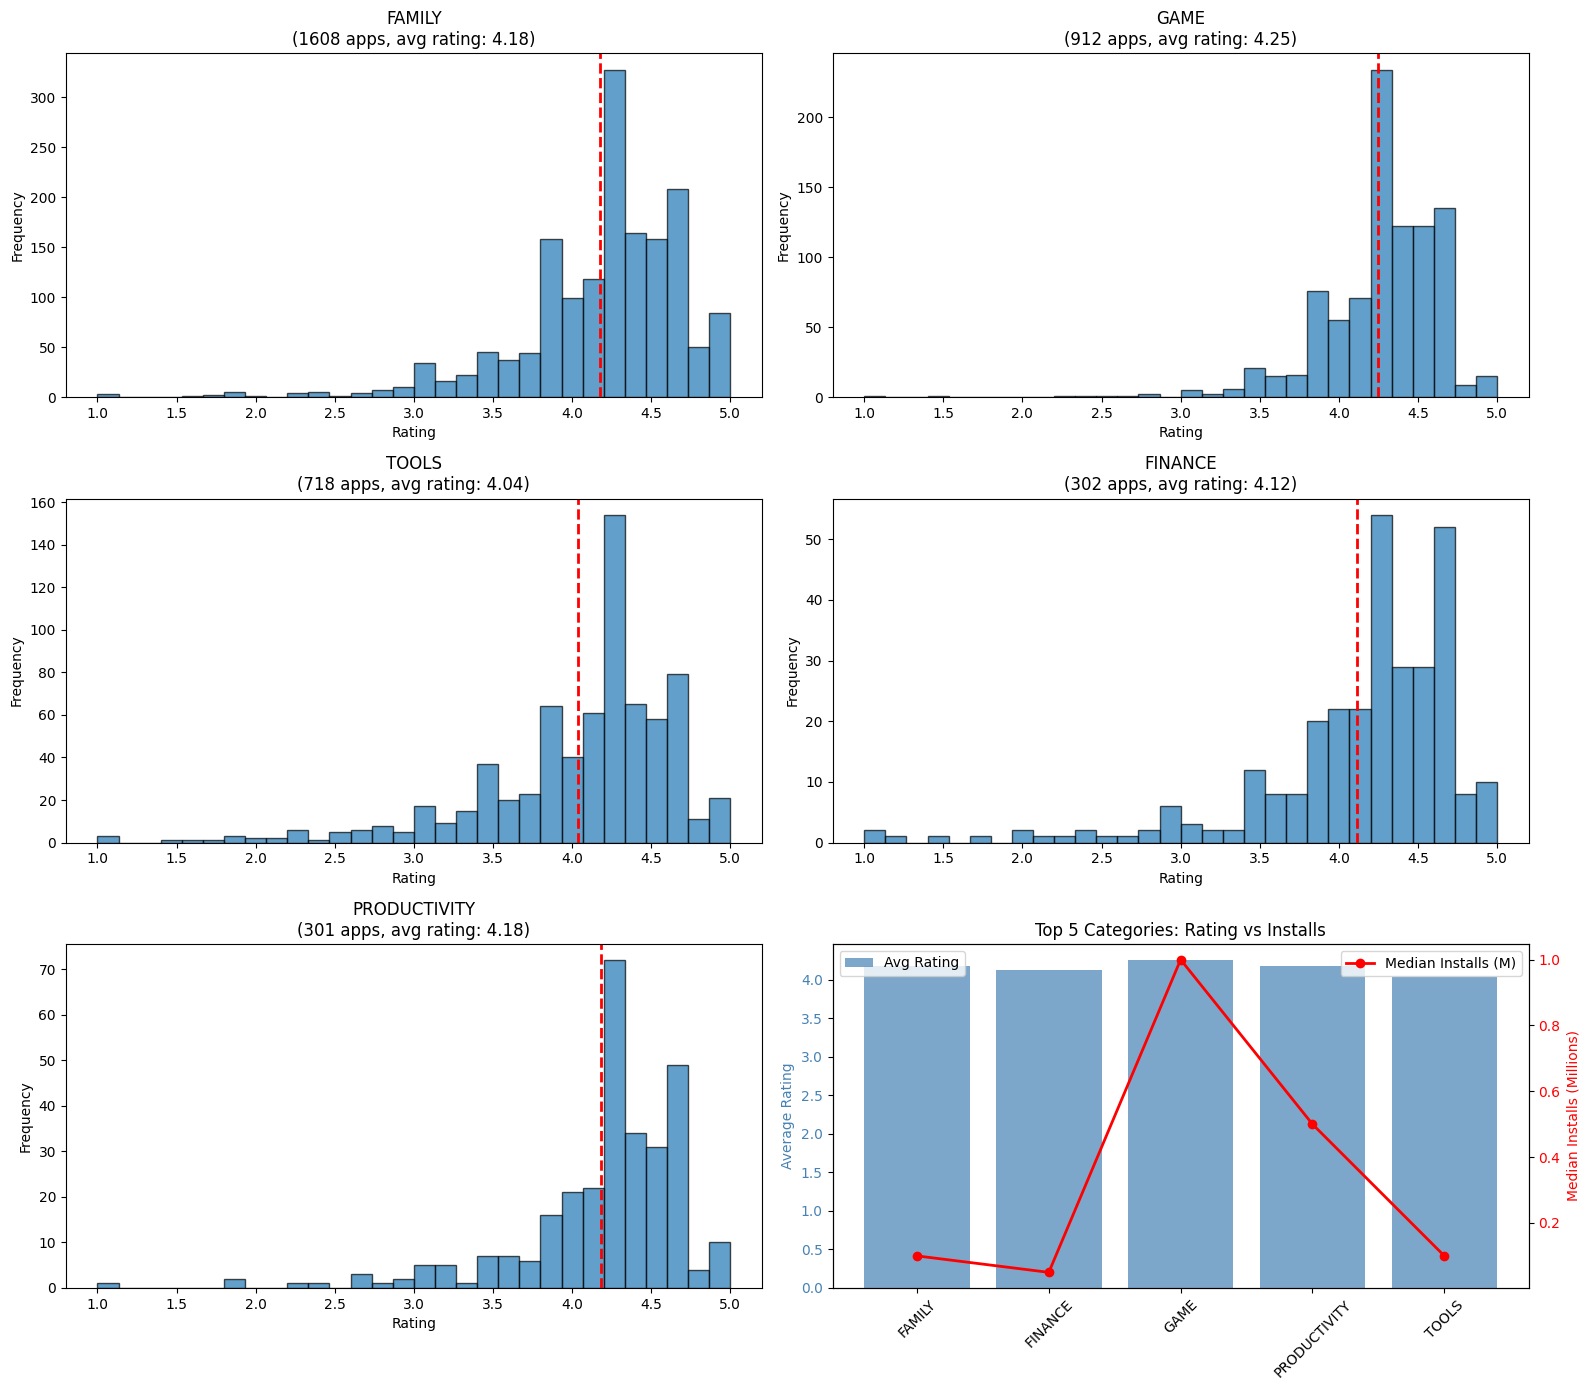

In [6]:
# Select top 5 categories
top_5_categories = df_apps['Category'].value_counts().head(5).index

# Analyze competition
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, category in enumerate(top_5_categories):
    cat_data = df_apps[df_apps['Category'] == category]

    # Rating distribution
    axes[idx].hist(cat_data['Rating'], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel('Rating')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{category}\n({len(cat_data)} apps, avg rating: {cat_data["Rating"].mean():.2f})')
    axes[idx].axvline(cat_data['Rating'].mean(), color='red', linestyle='--', linewidth=2)

# Overall comparison in last subplot
category_comparison = df_apps[df_apps['Category'].isin(top_5_categories)].groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'median'
}).round(2)

ax2 = axes[5].twinx()
bars = axes[5].bar(category_comparison.index, category_comparison['Rating'],
                   color='steelblue', alpha=0.7, label='Avg Rating')
axes[5].set_ylabel('Average Rating', color='steelblue')
axes[5].tick_params(axis='y', labelcolor='steelblue')
axes[5].tick_params(axis='x', rotation=45)

line = ax2.plot(category_comparison.index, category_comparison['Installs']/1e6,
               color='red', marker='o', linewidth=2, label='Median Installs (M)')
ax2.set_ylabel('Median Installs (Millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

axes[5].set_title('Top 5 Categories: Rating vs Installs')
axes[5].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### 7. Sentiment vs Rating Analysis

=== Average Rating by Sentiment ===
Sentiment
Neutral     4.235020
Negative    4.290810
Positive    4.332227
Name: Rating, dtype: float64


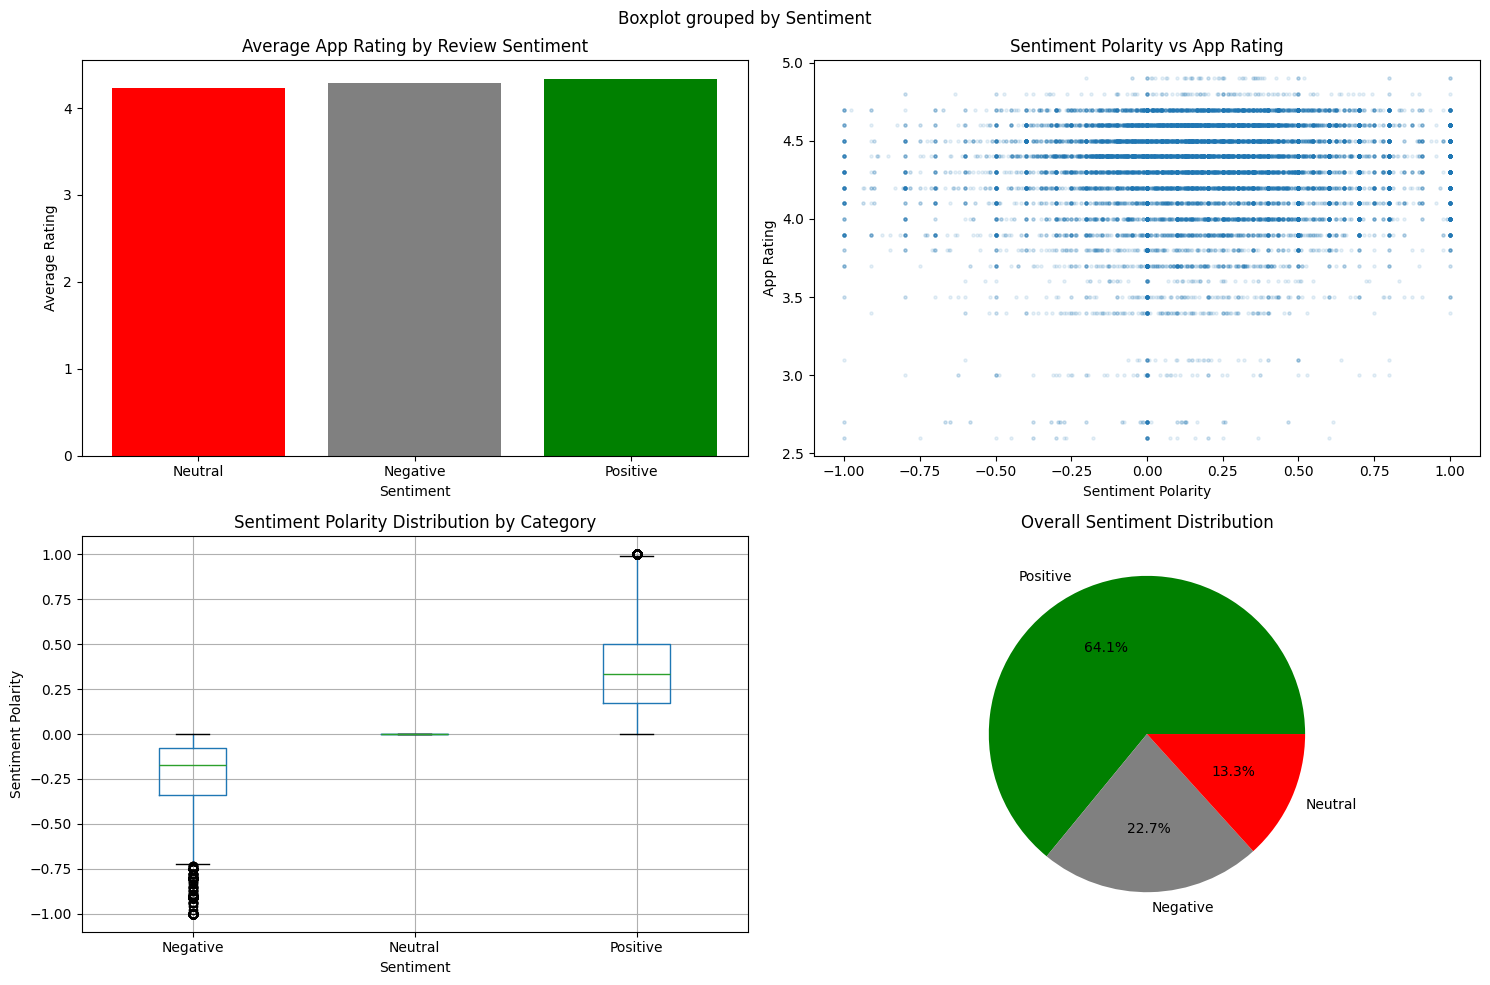


Correlation between Sentiment Polarity and Rating: 0.075


In [7]:
# Merge datasets
merged_data = df_reviews.merge(df_apps[['App', 'Rating', 'Category']], on='App', how='left')

# Analyze sentiment by rating
sentiment_by_rating = merged_data.groupby('Sentiment')['Rating'].mean().sort_values()

print("=== Average Rating by Sentiment ===")
print(sentiment_by_rating)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sentiment vs Rating
axes[0, 0].bar(sentiment_by_rating.index, sentiment_by_rating.values,
               color=['red', 'gray', 'green'])
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Average App Rating by Review Sentiment')

# Sentiment polarity vs app rating
valid_merged = merged_data[['Sentiment_Polarity', 'Rating']].dropna()
axes[0, 1].scatter(valid_merged['Sentiment_Polarity'], valid_merged['Rating'], alpha=0.1, s=5)
axes[0, 1].set_xlabel('Sentiment Polarity')
axes[0, 1].set_ylabel('App Rating')
axes[0, 1].set_title('Sentiment Polarity vs App Rating')

# Box plot of polarity by sentiment
merged_data.boxplot(column='Sentiment_Polarity', by='Sentiment', ax=axes[1, 0])
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Sentiment Polarity')
axes[1, 0].set_title('Sentiment Polarity Distribution by Category')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Sentiment distribution
sentiment_dist = merged_data['Sentiment'].value_counts()
axes[1, 1].pie(sentiment_dist.values, labels=sentiment_dist.index, autopct='%1.1f%%',
               colors=['green', 'gray', 'red'])
axes[1, 1].set_title('Overall Sentiment Distribution')

plt.tight_layout()
plt.show()

print(f"\nCorrelation between Sentiment Polarity and Rating: {valid_merged['Sentiment_Polarity'].corr(valid_merged['Rating']):.3f}")


### 8. Market Opportunity Analysis

=== Top 10 Market Opportunities ===
                App_Count  Median_Installs  Avg_Rating  Opportunity_Score
Category                                                                 
WEATHER                72        1000000.0        4.24          98.208955
FOOD_AND_DRINK         94        1000000.0        4.17          97.661692
ENTERTAINMENT         102        1000000.0        4.14          97.462687
EDUCATION             118        1000000.0        4.36          97.064677
VIDEO_PLAYERS         148        1000000.0        4.04          96.318408
SHOPPING              180        1000000.0        4.23          95.522388
COMMUNICATION         256        1000000.0        4.12          93.631841
PHOTOGRAPHY           263        1000000.0        4.16          93.457711
GAME                  912        1000000.0        4.25          77.313433
HOUSE_AND_HOME         62         500000.0        4.15          68.457711


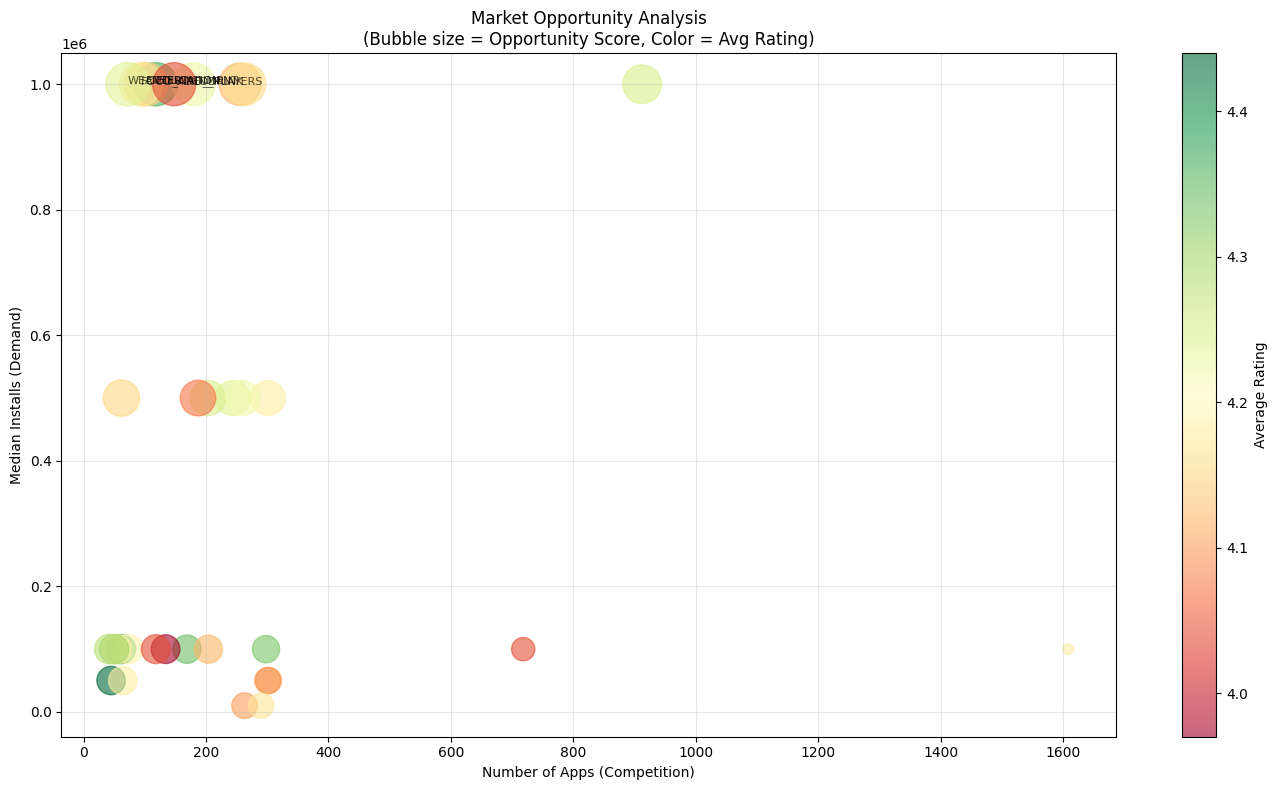

In [8]:
# Identify underserved categories (low competition, high demand)
market_analysis = df_apps.groupby('Category').agg({
    'App': 'count',
    'Installs': 'median',
    'Rating': 'mean'
}).round(2)

market_analysis.columns = ['App_Count', 'Median_Installs', 'Avg_Rating']
market_analysis['Competition_Level'] = pd.cut(market_analysis['App_Count'],
                                               bins=[0, 50, 200, 1000],
                                               labels=['Low', 'Medium', 'High'])

# Calculate opportunity score
market_analysis['Opportunity_Score'] = (
    (market_analysis['Median_Installs'] / market_analysis['Median_Installs'].max()) * 0.6 +
    (1 - market_analysis['App_Count'] / market_analysis['App_Count'].max()) * 0.4
) * 100

top_opportunities = market_analysis.nlargest(10, 'Opportunity_Score')
print("=== Top 10 Market Opportunities ===")
print(top_opportunities[['App_Count', 'Median_Installs', 'Avg_Rating', 'Opportunity_Score']])

# Visualize opportunity matrix
plt.figure(figsize=(14, 8))
scatter = plt.scatter(market_analysis['App_Count'],
                     market_analysis['Median_Installs'],
                     s=market_analysis['Opportunity_Score']*10,
                     c=market_analysis['Avg_Rating'],
                     cmap='RdYlGn', alpha=0.6)

# Annotate top opportunities
for idx in top_opportunities.head(5).index:
    plt.annotate(idx,
                (market_analysis.loc[idx, 'App_Count'],
                 market_analysis.loc[idx, 'Median_Installs']),
                fontsize=8, alpha=0.7)

plt.xlabel('Number of Apps (Competition)')
plt.ylabel('Median Installs (Demand)')
plt.title('Market Opportunity Analysis\n(Bubble size = Opportunity Score, Color = Avg Rating)')
plt.colorbar(scatter, label='Average Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 9. Key Business Recommendations

In [9]:
print("=" * 60)
print("KEY BUSINESS INSIGHTS")
print("=" * 60)

# 1. Best performing categories
top_cat = category_metrics.nlargest(3, 'Total_Installs')
print("\n1. MOST POPULAR CATEGORIES:")
for cat in top_cat.index:
    print(f"   • {cat}: {top_cat.loc[cat, 'Total_Installs']/1e9:.1f}B installs")

# 2. Optimal price range
optimal_price = price_analysis.nlargest(1, 'Avg_Rating')
print(f"\n2. OPTIMAL PRICE RANGE: {optimal_price.index[0]}")
print(f"   Average rating: {optimal_price['Avg_Rating'].values[0]}")

# 3. Update frequency importance
recent_updates = update_analysis.loc['< 1 month']
old_updates = update_analysis.loc['> 1 year']
print(f"\n3. UPDATE FREQUENCY IMPACT:")
print(f"   Recent updates (< 1 month): {recent_updates['Avg_Rating']:.2f} rating")
print(f"   Old updates (> 1 year): {old_updates['Avg_Rating']:.2f} rating")

# 4. Market opportunities
print(f"\n4. TOP MARKET OPPORTUNITIES:")
for idx, cat in enumerate(top_opportunities.head(3).index, 1):
    print(f"   {idx}. {cat} (Score: {top_opportunities.loc[cat, 'Opportunity_Score']:.1f})")

# 5. Success factors
print(f"\n5. SUCCESS FACTORS:")
print(f"   • Platform success rate: {success_rate:.1f}%")
print(f"   • Free apps success rate: {df_apps[df_apps['Type']=='Free']['Success'].mean()*100:.1f}%")
print(f"   • Paid apps success rate: {df_apps[df_apps['Type']=='Paid']['Success'].mean()*100:.1f}%")

print("\n" + "=" * 60)


KEY BUSINESS INSIGHTS

1. MOST POPULAR CATEGORIES:
   • GAME: 13.9B installs
   • COMMUNICATION: 11.0B installs
   • TOOLS: 8.0B installs

2. OPTIMAL PRICE RANGE: $0-1
   Average rating: 4.3

3. UPDATE FREQUENCY IMPACT:
   Recent updates (< 1 month): 4.27 rating
   Old updates (> 1 year): 4.07 rating

4. TOP MARKET OPPORTUNITIES:
   1. WEATHER (Score: 98.2)
   2. FOOD_AND_DRINK (Score: 97.7)
   3. ENTERTAINMENT (Score: 97.5)

5. SUCCESS FACTORS:
   • Platform success rate: 20.2%
   • Free apps success rate: 21.8%
   • Paid apps success rate: 0.3%

